## Fitting Sigmoid to empirical NN
### Manually selecting bin size

In [3]:
# 9 Species: AT, CE, DM, ...
# 8 Classes: ER, ERDD, GEO, GEOGD ...(each with ~500 data points)
# normalization is done on each species seperetaly.
'''
try adding list of every sigmoid functions not just arctan_gd
'''

'\ntry adding list of every sigmoid functions not just arctan_gd\n'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.special import erf
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FormatStrFormatter

### normalization on AT,CE

In [5]:
classes = ['ER', 'ERDD', 'GEO', 'GEOGD', 'HGG', 'SF', 'SFDD', 'Sticky', 'Original']
classes_pred = ['ER', 'ERDD', 'GEO', 'GEOGD', 'HGG', 'SF', 'SFDD', 'Sticky']
#data_locations = [r"/content/drive/MyDrive/random stuff/Adaptable-Sigmoids/data/AT"+c for c in classes]
data_locations = [r"/Users/lizongli/Desktop/knn research/Adaptable-Sigmoids/data/AT"+c for c in classes]
#data_locations_CE = [r"/content/drive/MyDrive/random stuff/Adaptable-Sigmoids/data/CE"+c for c in classes]
data_locations_CE = [r"/Users/lizongli/Desktop/knn research/Adaptable-Sigmoids/data/CE"+c for c in classes]
#prediction_p_value = "/content/drive/MyDrive/random stuff/Adaptable-Sigmoids/data/ATOriginal"
prediction_p_value = "Users/lizongli/Desktop/knn research/Adaptable-Sigmoids/data/ATOriginal"

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# def combine_data(data_location,classes):
#     df_comb = pd.DataFrame()
#     i = 0
#     for protein in data_location:
#         df = pd.read_csv(protein, header = None, sep = ' ')
#         # print(df.head)
#         # print(df['class'])
#         df['class'] = classes[i]
#         # print(classes[i])
#         df_comb = pd.concat([df, df_comb])
#         # print(df.head)
#         # print("------")
#         i += 1
#     return df_comb

In [8]:
def combine_data1(data_list, classes):
    df_comb = pd.DataFrame()
    i = 0
    for df in data_list:
        df['class'] = classes[i]
        df_comb = pd.concat([df, df_comb])
        i += 1
    return df_comb

In [11]:
# # df_comb = combine_data(["/Users/lizongli/Desktop/knn research/Adaptable-Sigmoids/data/ATER", "/Users/lizongli/Desktop/knn research/Adaptable-Sigmoids/data/ATOriginal"], ["ER", "Original"])
d1 = pd.read_csv("/Users/lizongli/Desktop/knn research/Adaptable-Sigmoids/data/ATER", header = None, sep = ' ')
d2 = pd.read_csv("/Users/lizongli/Desktop/knn research/Adaptable-Sigmoids/data/ATOriginal", header = None, sep = ' ')
df_comb1 = combine_data1([d1, d2], ["ER", "Orginal"])

In [15]:
# df_comb = combine_data(data_locations,classes)
# # df_comb = combine_data(["/Users/lizongli/Desktop/knn research/Adaptable-Sigmoids/data/ATER", "/Users/lizongli/Desktop/knn research/Adaptable-Sigmoids/data/ATOriginal"], ["ER", "Original"])
# df_class = df_comb['class']
# df_comb = df_comb.drop("class", axis = 1)
# print(df_comb.head)
# df_comb = pd.DataFrame(MinMaxScaler().fit_transform(df_comb))
# df_comb['class'] = df_class.reset_index(drop = True)

# df_comb["class"]
# print(df_comb1.head)
df_class = df_comb1['class']
# print(df_comb1.head)
df_comb1 = df_comb1.drop("class", axis = 1)
print(df_comb1.head)
df_comb1 = pd.DataFrame(MinMaxScaler().fit_transform(df_comb1))
df_comb1['class'] = df_class.reset_index(drop = True)

<bound method NDFrame.head of            0         1         2         3         4         5         6   \
0    0.466544  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.706691  0.003500  0.000825  0.001989  0.000058  0.000012  0.000104   
2    0.435380  0.002279  0.000478  0.001326  0.000044  0.000021  0.000071   
3    0.472044  0.002614  0.000868  0.001592  0.000050  0.000011  0.000105   
4    0.513291  0.003244  0.000912  0.002013  0.000069  0.000017  0.000102   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.284143  0.001414  0.000781  0.000800  0.000029  0.000012  0.000095   
496  0.358387  0.002115  0.000738  0.001335  0.000046  0.000006  0.000100   
497  0.955087  0.005445  0.000825  0.003229  0.000100  0.000016  0.000106   
498  0.366636  0.002216  0.001042  0.001333  0.000046  0.000017  0.000116   
499  0.479377  0.002682  0.000651  0.001578  0.000054  0.000011  0.000080   

           7    8         9   ...            

In [96]:
df_CE = combine_data(data_locations_CE,classes)
df_class_CE = df_CE['class']
df_CE = df_CE.drop("class", axis = 1)
df_CE = pd.DataFrame(MinMaxScaler().fit_transform(df_CE))
df_CE['class'] = df_class_CE.reset_index(drop = True)

In [97]:
# calling data(data_frame, class_name) return Species-Class empirical data as an array
def data(dataframe, class_name):
    return dataframe[dataframe['class']==class_name].drop("class",axis=1).to_numpy()

### helper functions

In [98]:
# calculating empirical data's shortest(NN) distance 
# real data is high-dimensional data points
def data_distance(data):
    shortest_distance = [0]*len(data)
    for i in range(len(data)):
        x = np.delete(data,i,0)
        temp = (x-data[i])**2
        d = np.sqrt(np.sum(temp,axis=1))
        shortest_distance[i] = d.min()
    
    return np.array(shortest_distance)   # return an array of real data's NN distance


# plotting empirical data's NN hist
def plot_data_distance(D, title):
    """
    D: an array of real data' NN distance
    """
    f, ax = plt.subplots(1,1, figsize = (6,4))
    ax.hist(D,edgecolor='white',bins=100)   ## consider specifying <bins>
    ax.set_title(title)
    plt.show()
    return


# generate empirical CDF manually, satisfying:
# 1. F(x<=0) = 0
# 2. F(x_1) = 1/(n+1)
# 3. F(x_n/2) = 0.5
# 4. F(x_n) = n/(n+1)
# 5. F(x) < 1 for all x.
def empirical_CDF(data,title):
    '''
    return x,y data of CDF 
    '''    
    sort_data = np.sort(data)
    #print("data len: ",len(sort_data))
    x = np.concatenate(([0],sort_data))
    #print("x len : ",len(x))
    #print("first: ", x[0], "\nlast: ",x[-1])
    
    y = np.zeros((x.shape))
    for i in range(1,len(x)):
        y[i] = i/len(x)
    #print(plt.show())
    return x,y



# curve_fit()
def auto_curve_fit(data_NN, x, y, x_scale_factor, func, s, p_control=None):
    '''
    data_NN: array empirical data_distance for calculating median
    x,y: from CDF
    s: sigma in curve_fit(), for weighting
    '''
    if p_control == "Gompertz":
        p0 = [1,1]
    elif p_control == "Weight":
        p0 = [np.median(data_NN)/x_scale_factor,1,0.5]
    else:
        p0 = [np.median(data_NN)/x_scale_factor,1] # this is initial guess for sigmoid parameters
    
    popt, pcov = curve_fit(f=func, xdata=x/x_scale_factor, ydata=y, p0=p0,method='lm')

    # parameters yielded by Curve_fit: x0, k
    print("curve_fit parameter on "+str(func)[9:-22]+": ", popt)
    return popt

arctan_popt = {}
logistic_popt = {}
tanh_popt = {}
arc_popt = {}
gd_popt = {}
ERF_popt = {}
algebra_popt = {}
Gompertz_popt = {}

# plot fitted sigmoid and empirical curve in 1-y and y: i.e. y-axis = p-value and CDF
def sigmoids_for_class(data, name, factor, func_list, color_list, binning=False):
    if binning:
        x,y = binning_xy(data_binning(data))
    else:
        x,y = empirical_CDF(data, name)
    
    # axis[0] = 1-y = p_value (on log space)
    # axis[1] = y = CDF
    f,ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].set_title('1-y(p_value) of '+name)
    ax[0].set_yscale('log')
    ax[0].scatter(x,1-y, color='b',s=10)
    
    ax[1].set_title('y of '+name)
    ax[1].scatter(x,y, color='b',s=10)
    
    print("For ",name," :")
    for i in range(len(func_list)):
        try:
            if i == 7:
                p = auto_curve_fit(data,x,y,factor,func_list[i],s=y,p_control="Gompertz")
            elif i == 6:
                p = auto_curve_fit(data,x,y,factor,func_list[i],s=y,p_control="Weight")
            else:
                p = auto_curve_fit(data,x,y,factor,func_list[i],s=y)
        except RuntimeError:
            print("error in ",str(func_list[i])[9:-22])
            continue
        y2 = func_list[i](x/factor, *p)
        #print(y2)
        if func_list[i] == arctan_GD:
          arctan_popt[f"{name}"] = p
        if func_list[i] == logistic:
            logistic_popt[f"{name}"] = p
        if func_list[i] == tanh:
            tanh_popt[f"{name}"] = p
        if func_list[i] == arctan:
            arc_popt[f"{name}"] = p
        if func_list[i] == GD:
            gd_popt[f"{name}"] = p
        if func_list[i] == ERF:
            ERF_popt[f"{name}"] = p
        if func_list[i] == algebra:
            algebra_popt[f"{name}"] = p
        if func_list[i] == Gompertz:
            Gompertz_popt[f"{name}"] = p

        ax[0].plot(x, 1-y2, color=color_list[i], label=str(func_list[i])[9:-22])
        ax[1].plot(x, y2, color=color_list[i], label=str(func_list[i])[9:-22])
        #print(Gompertz_popt)
        #print(func_list)
    
    ax[0].legend(loc='lower left')
    ax[1].legend(loc='lower left')
    plt.show()

### Sigmoid functions

In [99]:
# 4.11 Adjust range to (0,1)

def logistic(x,x0, k):
    m = (1/ (1 + np.exp(-k*(x-x0))))      
    return m

def tanh(x, x0, k): 
    m = (1+np.tanh(k*(x-x0)))/2
    return m

def arctan(x, x0, k):
    m = (1+(2/np.pi)*np.arctan(k*(x-x0)))/2
    return m

def GD(x, x0, k):
    m = (1+(4/np.pi)*np.arctan(np.tanh(k*(x-x0))))/2
    return m

def ERF(x, x0, k):
    m = (1+erf(k*(x-x0)))/2
    return m

def algebra(x, x0, k):
    m = (1+x/((1+abs(x)**k)**(1/k)))/2
    return m

def arctan_GD(x,x0,k, w):
    m = w*GD(x,x0,k)+(1-w)*arctan(x,x0,k)
    return m

def Gompertz(x,b,c):
    m = np.e**(-np.e**(b-c*x))
    return m

### Fitting on All points without binning

In [100]:

factors = [1e-5,  1e-2,   1e-4,   1e-3,   1e-2,  1e-4, 1e-2,   1e-3]
# factors = [1,1,1,1,1,1,1,1]
colors = ['g','r','c','m','y','k','brown','gray']
functions = [logistic, tanh, arctan, GD, ERF, algebra, arctan_GD, Gompertz]

For  ER  :
curve_fit parameter on  logis:  [0.74609738 4.29314045]
curve_fit parameter on  t:  [0.74609741 2.14656991]
curve_fit parameter on  arc:  [0.73438878 4.44390805]
curve_fit parameter on :  [0.74436816 1.75538436]
curve_fit parameter on  :  [0.74823162 1.81804087]
curve_fit parameter on  alge:  [0.7063388  0.42247565]
curve_fit parameter on  arctan:  [0.74033187 2.25764551 0.68600891]
curve_fit parameter on  Gompe:  [1.75786274 2.90931778]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


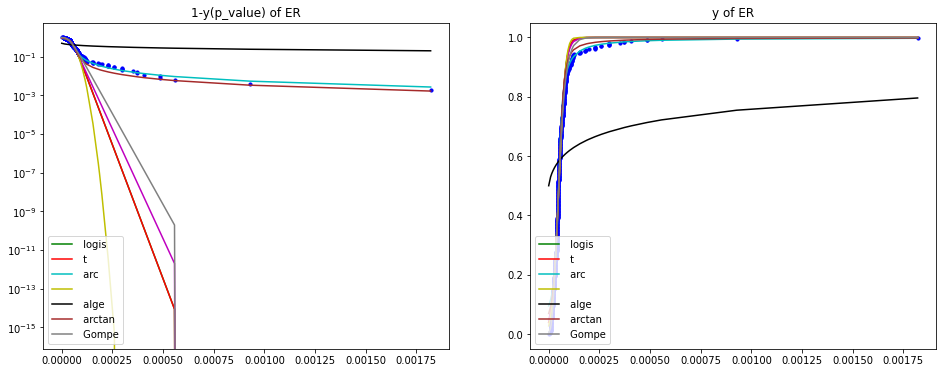

For  ERDD  :
curve_fit parameter on  logis:  [0.85422946 3.37587043]
curve_fit parameter on  t:  [0.85422959 1.68793284]
curve_fit parameter on  arc:  [0.84002395 3.33586695]
curve_fit parameter on :  [0.85190945 1.37126769]
curve_fit parameter on  :  [0.85758766 1.44066784]
curve_fit parameter on  alge:  [0.81624829 0.39290878]
curve_fit parameter on  arctan:  [0.85006999 1.47278541 0.90005227]
curve_fit parameter on  Gompe:  [1.58329433 2.35712784]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


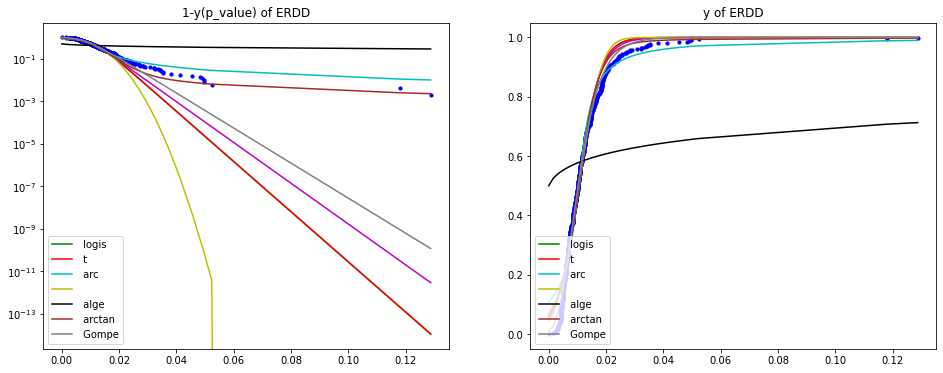

For  GEO  :
curve_fit parameter on  logis:  [0.81391309 3.98403236]
curve_fit parameter on  t:  [0.81391317 1.99201607]
curve_fit parameter on  arc:  [0.79797621 3.93001527]
curve_fit parameter on :  [0.81174147 1.61430741]
curve_fit parameter on  :  [0.81670624 1.70671086]
curve_fit parameter on  alge:  [0.75766946 0.38141551]
curve_fit parameter on  arctan:  [ 0.80976294  8.85553716 -0.94404642]
curve_fit parameter on  Gompe:  [1.83358249 2.77189869]


/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: divide by zero encountered in power
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: invalid value encountered in true_divide
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


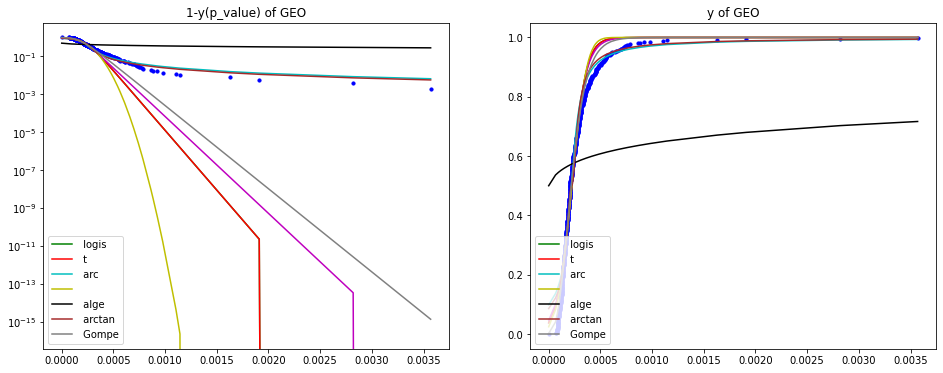

For  GEOGD  :
curve_fit parameter on  logis:  [0.3548311  5.63089266]
curve_fit parameter on  t:  [0.35483182 2.81543186]
curve_fit parameter on  arc:  [0.33998243 5.3686164 ]
curve_fit parameter on :  [0.35290241 2.26749326]
curve_fit parameter on  :  [0.3574192  2.42648315]
curve_fit parameter on  alge:  [0.30217549 0.78112375]
curve_fit parameter on  arctan:  [ 0.35135358 13.44138922 -1.11345767]
curve_fit parameter on  Gompe:  [0.99437121 3.98181538]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


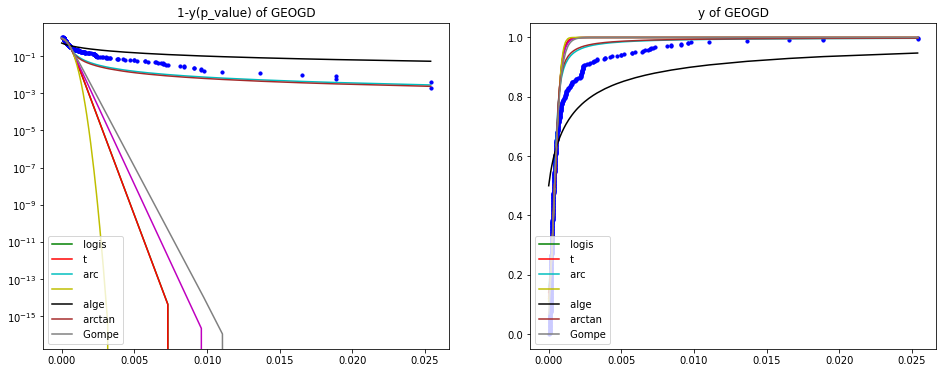

For  HGG  :
curve_fit parameter on  logis:  [0.78789559 3.22939405]
curve_fit parameter on  t:  [0.78789511 1.61470027]
curve_fit parameter on  arc:  [0.75761668 3.27552012]
curve_fit parameter on :  [0.78346421 1.31237476]
curve_fit parameter on  :  [0.79416174 1.37452484]
curve_fit parameter on  alge:  [0.71565964 0.42324306]
curve_fit parameter on  arctan:  [ 0.77638831  8.26725314 -1.1282138 ]
curve_fit parameter on  Gompe:  [1.38823968 2.29767846]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


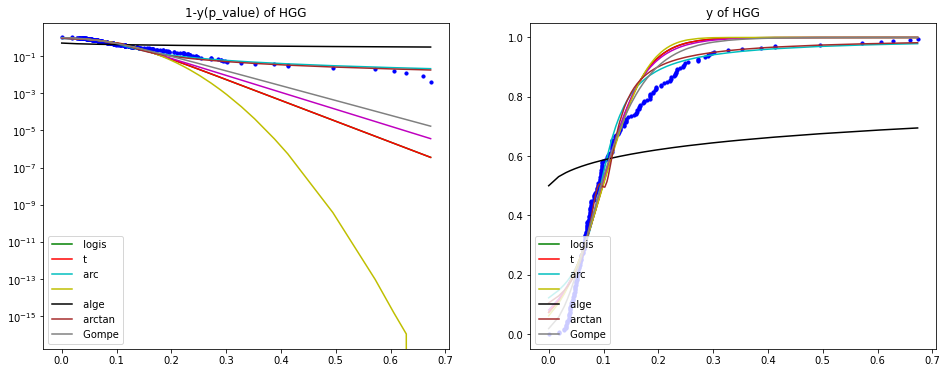

For  SF  :
curve_fit parameter on  logis:  [0.91883645 4.90069174]
curve_fit parameter on  t:  [0.91883648 2.45034608]
curve_fit parameter on  arc:  [0.90816128 4.84965765]
curve_fit parameter on :  [0.91721502 1.99006756]
curve_fit parameter on  :  [0.92098551 2.09301509]
curve_fit parameter on  alge:  [0.89158424 0.31270279]
curve_fit parameter on  arctan:  [0.91686834 2.02950445 0.97190028]
curve_fit parameter on  Gompe:  [2.72942177 3.43764009]


/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: divide by zero encountered in power
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: invalid value encountered in true_divide
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


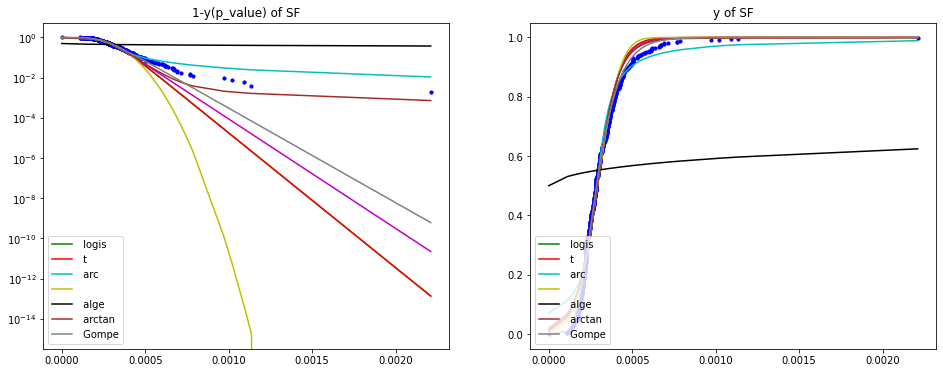

For  SFDD  :
curve_fit parameter on  logis:  [0.65634747 4.49207278]
curve_fit parameter on  t:  [0.65634749 2.24603623]
curve_fit parameter on  arc:  [0.63733876 4.52980293]
curve_fit parameter on :  [0.65343424 1.82757353]
curve_fit parameter on  :  [0.66035964 1.91079461]
curve_fit parameter on  alge:  [0.60853718 0.44604358]
curve_fit parameter on  arctan:  [0.64091487 3.03302273 0.39888764]
curve_fit parameter on  Gompe:  [1.64090678 3.13348569]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


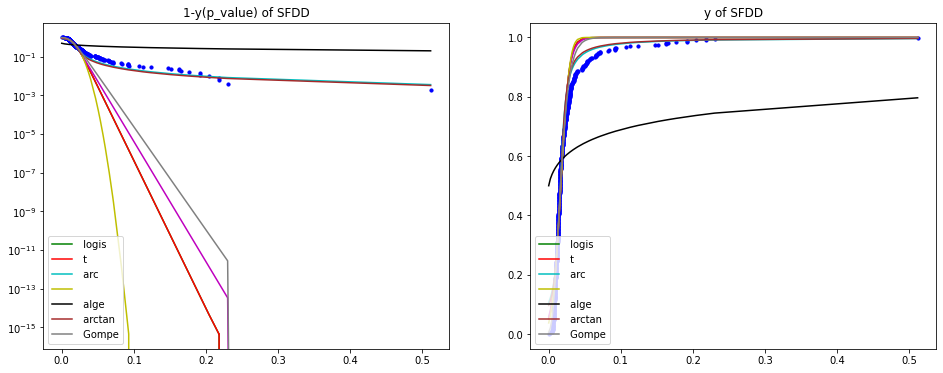

In [101]:
# AT
for i in range(len(classes_pred[:-1])):
    data_i = data_distance(data(df_comb,classes_pred[:-1][i]))
    sigmoids_for_class(data_i, classes_pred[:-1][i], np.mean(data_i), functions, colors)

For  ER  :
curve_fit parameter on  logis:  [0.84311907 4.19071931]
curve_fit parameter on  t:  [0.84311909 2.09535952]
curve_fit parameter on  arc:  [0.83423092 4.26169456]
curve_fit parameter on :  [0.84168112 1.71054944]
curve_fit parameter on  :  [0.84521007 1.77601156]
curve_fit parameter on  alge:  [0.81059285 0.37485748]
curve_fit parameter on  arctan:  [0.83920398 2.03068049 0.77663912]
curve_fit parameter on  Gompe:  [1.98391638 2.84785168]


/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: divide by zero encountered in power
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: invalid value encountered in true_divide
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


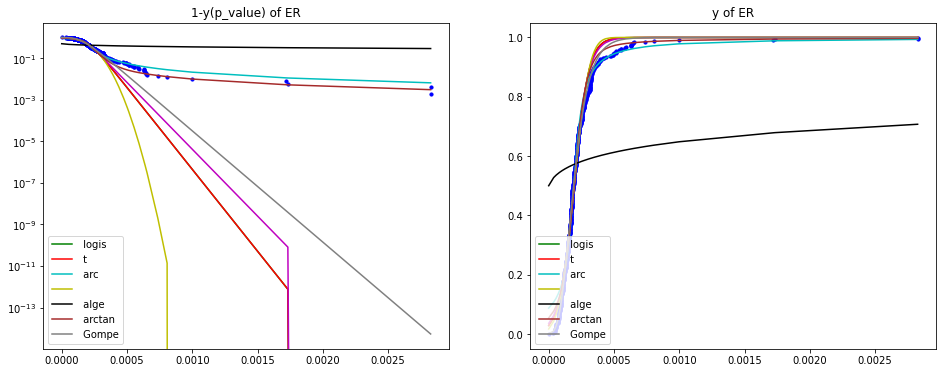

For  ERDD  :
curve_fit parameter on  logis:  [0.85264818 5.27442736]
curve_fit parameter on  t:  [0.85264818 2.63721356]
curve_fit parameter on  arc:  [0.84159729 5.2360311 ]
curve_fit parameter on :  [0.85104345 2.14212733]
curve_fit parameter on  :  [0.85481524 2.25043793]
curve_fit parameter on  alge:  [0.82123344 0.32998099]
curve_fit parameter on  arctan:  [0.84766261 2.6031922  0.74217325]
curve_fit parameter on  Gompe:  [2.69934044 3.65853708]


/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: divide by zero encountered in power
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: invalid value encountered in true_divide
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


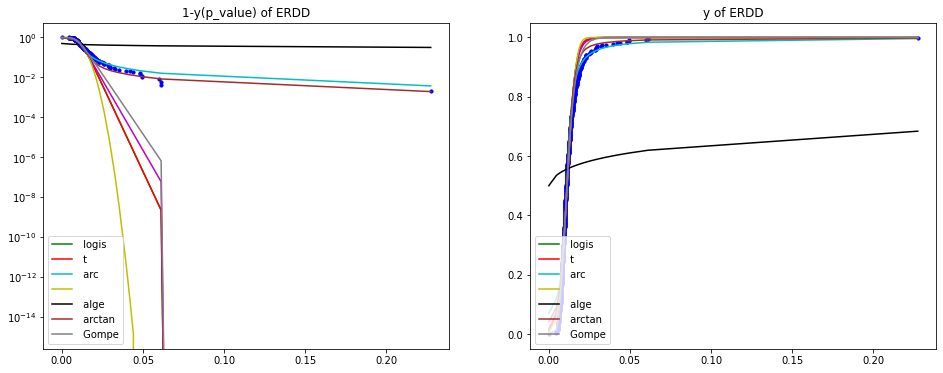

For  GEO  :
curve_fit parameter on  logis:  [0.92567258 5.02786581]
curve_fit parameter on  t:  [0.92567258 2.51393299]
curve_fit parameter on  arc:  [0.91827611 4.96155565]
curve_fit parameter on :  [0.92468564 2.04075416]
curve_fit parameter on  :  [0.92697128 2.14720338]
curve_fit parameter on  alge:  [0.89825336 0.31601685]
curve_fit parameter on  arctan:  [0.92384104 2.19253734 0.89941531]
curve_fit parameter on  Gompe:  [2.78535962 3.46467316]


/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: divide by zero encountered in power
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: invalid value encountered in true_divide
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


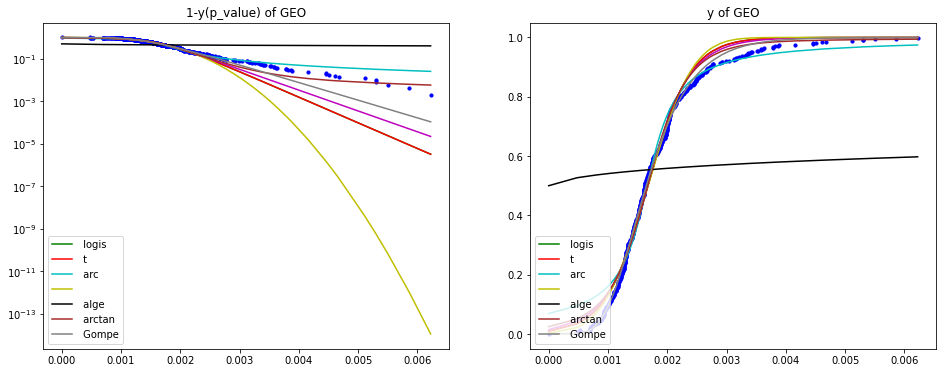

For  GEOGD  :
curve_fit parameter on  logis:  [0.59902211 3.81942545]
curve_fit parameter on  t:  [0.5990214  1.90971955]
curve_fit parameter on  arc:  [0.56556671 3.89114809]
curve_fit parameter on :  [0.59479969 1.54691347]
curve_fit parameter on  :  [0.60477311 1.63196588]
curve_fit parameter on  alge:  [0.50220547 0.50188954]
curve_fit parameter on  arctan:  [0.56755131 3.14676002 0.20901483]
curve_fit parameter on  Gompe:  [1.23843574 2.78103807]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


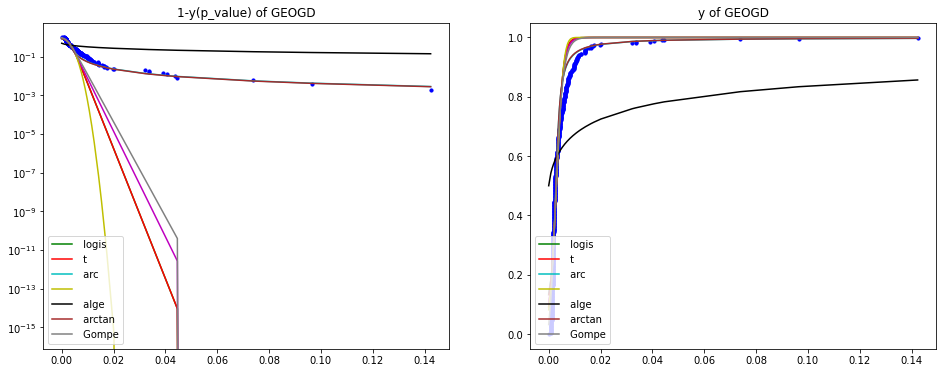

For  HGG  :
curve_fit parameter on  logis:  [0.60234175 3.69604923]
curve_fit parameter on  t:  [0.60234075 1.84803365]
curve_fit parameter on  arc:  [0.56424461 3.79777107]
curve_fit parameter on :  [0.59777389 1.49631735]
curve_fit parameter on  :  [0.60852172 1.57958966]
curve_fit parameter on  alge:  [0.49483972 0.50222967]
curve_fit parameter on  arctan:  [0.56577567 3.21240763 0.16417209]
curve_fit parameter on  Gompe:  [1.20607767 2.71547498]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


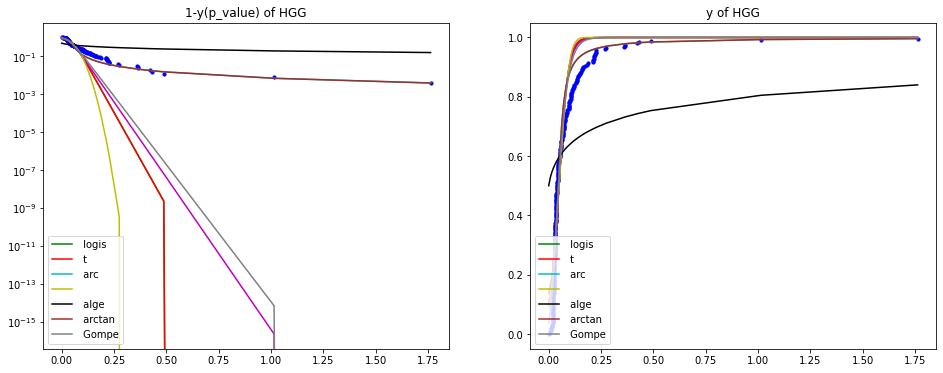

For  SF  :
curve_fit parameter on  logis:  [0.92382817 5.72415162]
curve_fit parameter on  t:  [0.92382818 2.86207602]
curve_fit parameter on  arc:  [0.91585135 5.72564899]
curve_fit parameter on :  [0.92271124 2.32789364]
curve_fit parameter on  :  [0.92525402 2.43801103]
curve_fit parameter on  alge:  [0.90051315 0.3028076 ]
curve_fit parameter on  arctan:  [0.92076705 2.736207   0.78523145]
curve_fit parameter on  Gompe:  [3.21352937 3.92862466]


/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: divide by zero encountered in power
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: invalid value encountered in true_divide
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


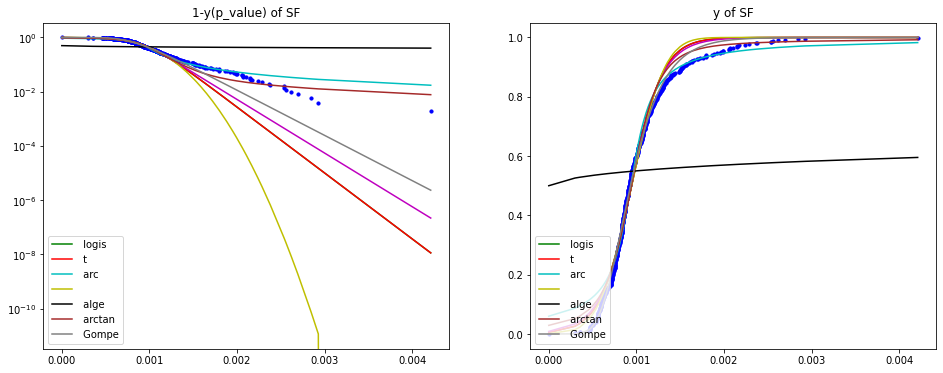

For  SFDD  :
curve_fit parameter on  logis:  [0.63384824 4.35227301]
curve_fit parameter on  t:  [0.63384823 2.17613672]
curve_fit parameter on  arc:  [0.61318326 4.34916869]
curve_fit parameter on :  [0.63081395 1.76465453]
curve_fit parameter on  :  [0.63834278 1.85598466]
curve_fit parameter on  alge:  [0.58616421 0.45390533]
curve_fit parameter on  arctan:  [0.61458628 3.31074667 0.27284923]
curve_fit parameter on  Gompe:  [1.52828595 3.06884237]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


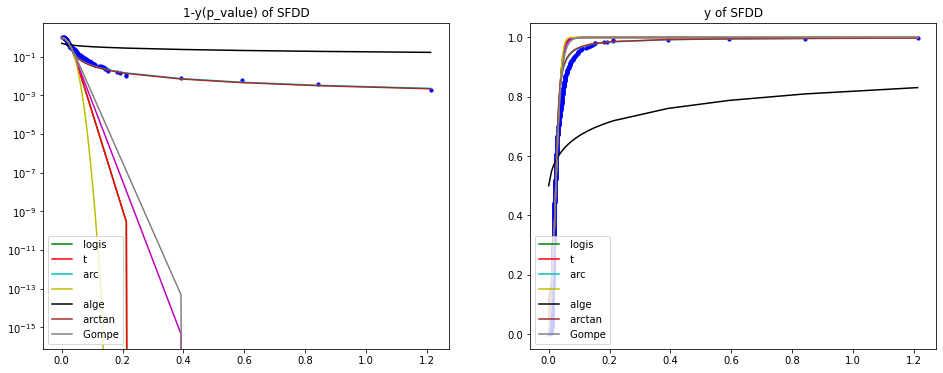

For  Sticky  :
curve_fit parameter on  logis:  [0.96273333 6.27012499]
curve_fit parameter on  t:  [0.96273328 3.13506036]
curve_fit parameter on  arc:  [0.95839206 6.22468997]
curve_fit parameter on :  [0.96212333 2.54920467]
curve_fit parameter on  :  [0.96353124 2.6738718 ]
curve_fit parameter on  alge:  [0.94541365 0.27545599]
curve_fit parameter on  arctan:  [0.96224326 2.50894231 1.02296407]
curve_fit parameter on  Gompe:  [3.71578309 4.30201012]


/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: divide by zero encountered in power
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/var/folders/cl/y520x4ts6zngnmzdyy7mjx280000gn/T/ipykernel_82864/217763432.py:24: RuntimeWarning: invalid value encountered in true_divide
  m = (1+x/((1+abs(x)**k)**(1/k)))/2
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


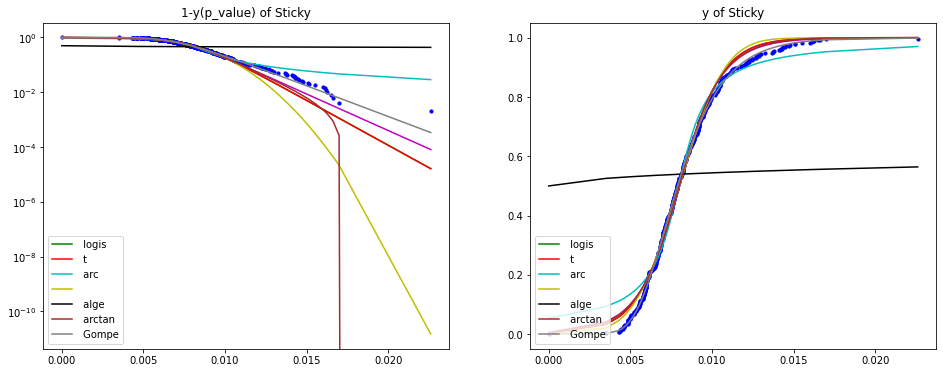

In [102]:
for i in range(len(classes[:-1])):
    data_i = data_distance(data(df_CE,classes[:-1][i]))
    sigmoids_for_class(data_i, classes[:-1][i], np.mean(data_i), functions, colors)

### Binning

In [103]:
# binning first, add (0,0) at the front later when calculate y
#make it smooth

def data_binning(data):
    
    x = np.sort(data) 
    N = len(x)                   # e.g N = 500, sqrt(500)=22.3
    lower = int(np.floor(np.sqrt(N))) # 22
    upper = int(np.ceil(np.sqrt(N)))  # 23 as total #of bin
    
    if lower*upper >= N:
        small_bin_num = int(lower*upper - N)  # 22*23 - 500 = 6
        small_bin_size = int(lower - 1)  # 21
        large_bin_size = lower
    else: # HGG -> sqrt(252) = 15.8
        small_bin_num = int(upper**2 - N) # 16*16-252 =4
        small_bin_size = lower  # 15
        large_bin_size = upper
    
    large_bin_num = int(upper - small_bin_num) # 23-6 = 17

    # small_bin_size*small_bin_num + lower*large_bin_num = N

    bin_count = [large_bin_size]*large_bin_num + [small_bin_size]*small_bin_num  # [22..*17, 21..*6,]
    print("items in each bin: ", bin_count)
    binned_data = []
    i = 0
    for count in bin_count:
        binned_data.append(np.mean(x[i:i+count]))
        i += count
    
    return binned_data


def binning_xy(binned_data):
    x = np.concatenate(([0],binned_data))
    y = np.zeros((x.shape))
    
    for i in range(1,len(x)):
        y[i] = i/len(x)
        
    return x,y
 

#### AT

In [104]:
# for i in range(len(classes[:-1])):
#     data_i = data_distance(data(df_comb,classes[:-1][i]))
#     sigmoids_for_class(data_i, classes[:-1][i], factors[i], functions, colors,binning=True)

#### CE

In [105]:
# for i in range(len(classes[:-1])):
#     data_i = data_distance(data(df_CE,classes[:-1][i]))
#     sigmoids_for_class(data_i, classes[:-1][i], factors[i], functions, colors,binning=True)

In [106]:
# arctan_popt

In [107]:
def euclid(origin, other):
  return np.sum((origin - other) ** 2)**(1/2)

def NN_distance(ref_point, data):
  nearest_distance = 1e999
  for point in data:
    if euclid(ref_point, point) < nearest_distance: 
      nearest_distance = euclid(ref_point, point)
  return nearest_distance

NN_dict = {}

In [108]:
original = df_comb[df_comb['class'] == 'Original']
for target in arctan_popt:
  nearest_distance = NN_distance(original.drop(['class'], axis = 1).to_numpy(), df_comb[df_comb['class'] == f'{target}'].drop(['class'], axis = 1).to_numpy())
  #NN_dict["arctan_GD"] = nearest_distance
  #print(NN_dict)
  #print(nearest_distance)
  print(arctan_GD(nearest_distance,*arctan_popt[f'{target}']))
  #least square fittinhg, make it as a library, can only have dataset with numbers, no images
  #different variables, weigh in a approtate place
  #create a library, then find a new data never see before, test it 
  #uci ml repository
#print(NN_dict)

0.9664408249707113
0.9718401609077627
0.9816160770959803
0.9426719231381333
0.9409854586707858
0.9748968260379774
0.7602980007563807
0.9831163142312822


In [109]:
original = df_comb[df_comb['class'] == 'Original']
for target in ERF_popt:
    nearest_distance1 = NN_distance(original.drop(['class'], axis = 1).to_numpy(), df_comb[df_comb['class'] == f'{target}'].drop(['class'], axis = 1).to_numpy())
    NN_dict["ERF"] = nearest_distance
    #print(nearest_distance1)
    print(ERF(nearest_distance1,*ERF_popt[f'{target}']))

0.9979047912685103
0.9998275832386696
0.9993566068852484
0.9989676231439084
0.9985992160995096
0.9997957519884658
0.7192790381298867
0.9952407075756056


In [110]:
original = df_comb[df_comb['class'] == 'Original']
for target in arc_popt:
    nearest_distance1 = NN_distance(original.drop(['class'], axis = 1).to_numpy(), df_comb[df_comb['class'] == f'{target}'].drop(['class'], axis = 1).to_numpy())
    NN_dict["arctan"] = nearest_distance
    print(arctan(nearest_distance1,*arc_popt[f'{target}']))

0.9359875132601504
0.9470633592822022
0.9406674900804892
0.9411454551811921
0.940078363767447
0.9467643059143869
0.7610020301402236
0.9272693697686288


In [111]:
original = df_comb[df_comb['class'] == 'Original']
for target in logistic_popt:
    nearest_distance1 = NN_distance(original.drop(['class'], axis = 1).to_numpy(), df_comb[df_comb['class'] == f'{target}'].drop(['class'], axis = 1).to_numpy())
    NN_dict["logistic"] = nearest_distance
    print(logistic(nearest_distance1,*arc_popt[f'{target}']))

0.9926480211877003
0.9974202961530098
0.995045886244151
0.9952584725824024
0.9947757400261619
0.9973310677286604
0.7449071931305266
0.9866147876810004


In [112]:
original = df_comb[df_comb['class'] == 'Original']
for target in tanh_popt:
    nearest_distance1 = NN_distance(original.drop(['class'], axis = 1).to_numpy(), df_comb[df_comb['class'] == f'{target}'].drop(['class'], axis = 1).to_numpy())
    NN_dict["tanh"] = nearest_distance
    print(tanh(nearest_distance1,*arc_popt[f'{target}']))

0.9999451477927102
0.9999933107042909
0.9999752123721757
0.9999773037080872
0.9999724204476746
0.9999928386763786
0.8950376829158593
0.9998159756214724


In [113]:
original = df_comb[df_comb['class'] == 'Original']
for target in gd_popt:
    nearest_distance1 = NN_distance(original.drop(['class'], axis = 1).to_numpy(), df_comb[df_comb['class'] == f'{target}'].drop(['class'], axis = 1).to_numpy())
    NN_dict["gd"] = nearest_distance
    print(GD(nearest_distance1,*arc_popt[f'{target}']))

0.9999650780847722
0.9999957414336016
0.9999842193148545
0.9999855507638673
0.9999824418274346
0.9999954409271374
0.925682158466362
0.999882824880276


In [114]:
original = df_comb[df_comb['class'] == 'Original']
for target in algebra_popt:
    nearest_distance1 = NN_distance(original.drop(['class'], axis = 1).to_numpy(), df_comb[df_comb['class'] == f'{target}'].drop(['class'], axis = 1).to_numpy())
    NN_dict["algebra"] = nearest_distance
    print(algebra(nearest_distance1,*arc_popt[f'{target}']))

0.9938896072214924
0.9973687238427779
0.996724395244702
0.9906829998094988
0.9900035957191846
0.9981185283485854
0.8904700305487386
0.9965215106654319


In [115]:
original = df_comb[df_comb['class'] == 'Original']
for target in Gompertz_popt:
    nearest_distance1 = NN_distance(original.drop(['class'], axis = 1).to_numpy(), df_comb[df_comb['class'] == f'{target}'].drop(['class'], axis = 1).to_numpy())
    NN_dict["Gompertz"] = nearest_distance
    print(Gompertz(nearest_distance1,*arc_popt[f'{target}']))

0.9995127127585773
0.9999268183992662
0.9998690163380536
0.9990717825763856
0.9989173818641494
0.9999646924569149
0.9570263517249185
0.9999092566966141


In [116]:
print(Gompertz_popt)

{'ER': array([1.98391638, 2.84785168]), 'ERDD': array([2.69934044, 3.65853708]), 'GEO': array([2.78535962, 3.46467316]), 'GEOGD': array([1.23843574, 2.78103807]), 'HGG': array([1.20607767, 2.71547498]), 'SF': array([3.21352937, 3.92862466]), 'SFDD': array([1.52828595, 3.06884237]), 'Sticky': array([3.71578309, 4.30201012])}
